In [1]:
from CSR import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
def plot_2D_contour(x, y, z):
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    norm = colors.TwoSlopeNorm( vcenter=0)
    surf = ax.imshow(z, extent=(min(x), max(x), min(y), max(y)), origin='lower',  cmap='seismic',aspect='auto', norm = norm)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    

    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('x ($ \mu m$)')
    plt.ylabel('z ($ m$)')
    return ax

In [3]:
DtestCSR = CSR2D(input_file= 'input/chicane_config.yaml')
DtestCSR.CSR_params.compute_CSR = 0
DtestCSR.run(stop_time  =5.75)

Finish step 2 in 0.3906280994415283 seconds
Finish step 3 in 0.40176963806152344 seconds
Finish step 4 in 0.40003108978271484 seconds
Finish step 5 in 0.44741153717041016 seconds
Finish step 6 in 0.40253686904907227 seconds
Finish step 7 in 0.8057694435119629 seconds
Finish step 8 in 0.44206738471984863 seconds
Finish step 9 in 0.4339725971221924 seconds
Finish step 10 in 0.4026811122894287 seconds
Finish step 11 in 0.4176807403564453 seconds
Finish step 12 in 1.1957767009735107 seconds
Finish step 13 in 0.496335506439209 seconds
Finish step 14 in 0.4832749366760254 seconds
Finish step 15 in 0.49898314476013184 seconds
Finish step 16 in 0.5004749298095703 seconds
Finish step 17 in 0.5323402881622314 seconds
Finish step 18 in 0.5084855556488037 seconds
Finish step 19 in 0.5637404918670654 seconds
Finish step 20 in 0.5278599262237549 seconds
Finish step 21 in 1.830153226852417 seconds
Finish step 22 in 0.5198376178741455 seconds
Finish step 23 in 0.5165650844573975 seconds
Finish step 24

In [4]:
DtestCSR.beam.sigma_x

0.0019019831990740072

In [5]:
t = DtestCSR.beam.position
print(t)
s  = t -0*DtestCSR.beam.sigma_z
x = (s-t)*DtestCSR.beam.slope[0] + 0*DtestCSR.beam.sigma_x


5.799999999999995


In [6]:
DtestCSR.formation_length

1.3737046326746893

In [7]:
xp, sp, CSR_integrand_z1, CSR_integrand_x1,CSR_integrand_z2, CSR_integrand_x2  = DtestCSR.get_CSR_wake(s, x, debug = True)

<Axes: xlabel='x ($ \\mu m$)', ylabel='z ($ m$)'>

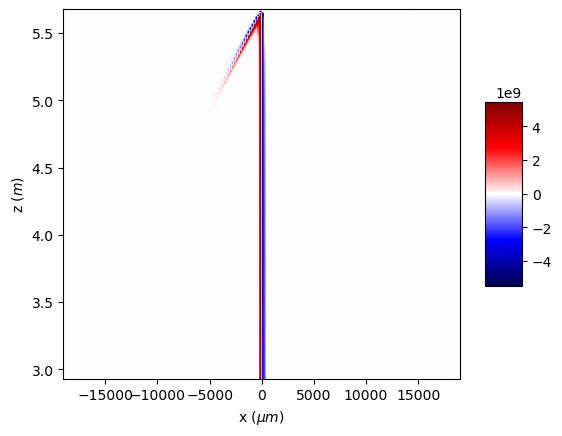

In [8]:
plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_z1.T)

<Axes: xlabel='x ($ \\mu m$)', ylabel='z ($ m$)'>

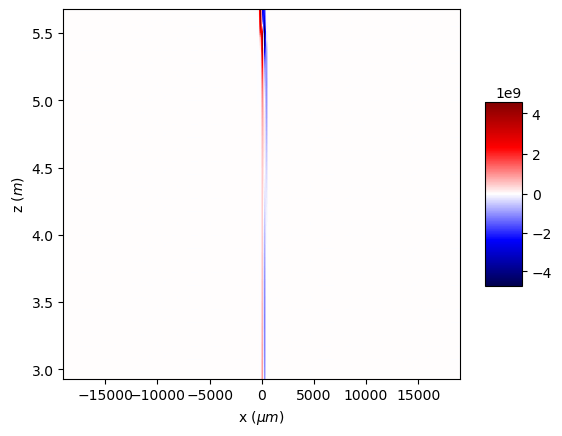

In [9]:
plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_z2.T)

## plot near singularity

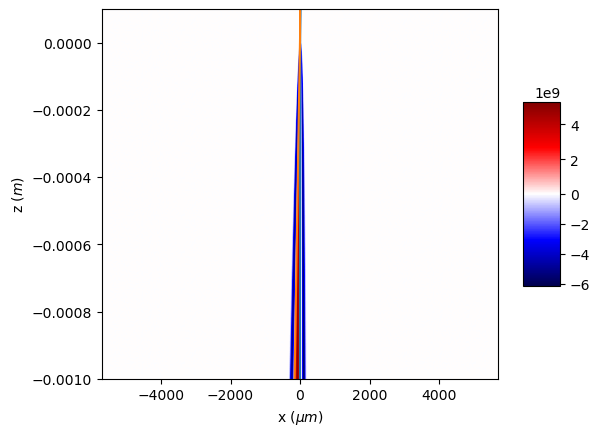

In [10]:
sp = np.linspace(s- 0.001, s + 0.0001, 1000)
sigx = DtestCSR.beam.sigma_x
xL = x -3*sigx
xR = x + 3*sigx
xp = np.linspace(xL, xR, 1000)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')




xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)


sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
ax.plot(xp1*1e6, (sp1 - t))
ax.plot(xp2*1e6, (sp2 - t))

## plot who range

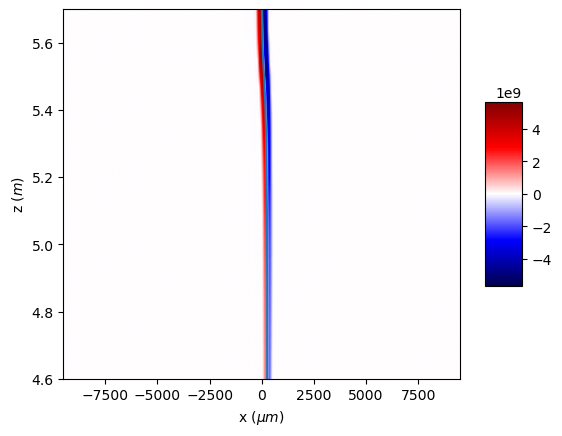

In [11]:
sp = np.linspace(s-1.2, s -0.1, 1000)
sigx = DtestCSR.beam.sigma_x
xL = x -5*sigx
xR = x + 5*sigx
xp = np.linspace(xL, xR, 1000)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)


sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_z.T)
ax.plot(xp1*1e6, (sp1 ))
ax.plot(xp2*1e6, (sp2 ))

## Plot area 1

In [12]:
DtestCSR.formation_length

1.3737046326746893

C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\CSR.py:441: RuntimeWarning: invalid value encountered in sqrt
  term = (- X0_s**2 * n_vec_sp_y**2 * k**2 + X0_s**2 +


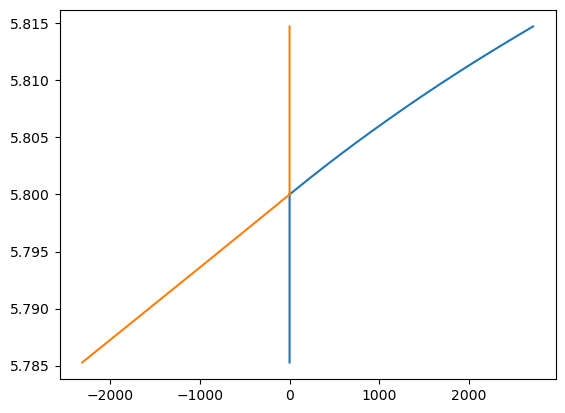

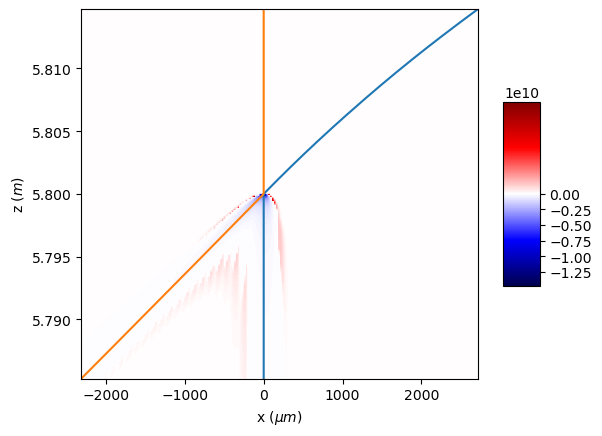

In [13]:


tan_a = DtestCSR.beam.slope[0]
tan_theta = -2*tan_a/(1-tan_a**2)
dz = np.abs(10*DtestCSR.beam.sigma_x/tan_theta)

sp = np.linspace(np.max((s - 100*DtestCSR.beam.sigma_z, 0)), s + 100*DtestCSR.beam.sigma_z , 100000)
xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)
ind  = (np.abs(xp1) < 5*DtestCSR.beam.sigma_x) &(np.abs(xp2) < 5*DtestCSR.beam.sigma_x)
plt.figure()
plt.plot(xp1*1e6, sp)
plt.plot(xp2*1e6, sp)

if sum(ind) == len(xp1):   # The two region are parallel and not tilted
    xmin = x - 5*DtestCSR.beam.sigma_x
    xmax = x + 5*DtestCSR.beam.sigma_x
    smin = s - 5*DtestCSR.beam.sigma_z
    smax = s + 5*DtestCSR.beam.sigma_z

else:
    xp1_valid = xp1[ind]
    xp2_valid = xp2[ind]
    sp_valid = sp[ind]
    smin = np.min(sp_valid)
    smax = np.max(sp_valid)
    xmin = np.min((np.min(xp1_valid), np.min(xp2_valid)))
    xmax = np.max((np.max(xp1_valid), np.max(xp2_valid)))


sp = np.linspace(smin, smax, 200)
xp = np.linspace(xmin, xmax, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_x.T)
ax.plot(xp1*1e6, sp1 )
ax.plot(xp2*1e6, sp2 )

## Plot area 2

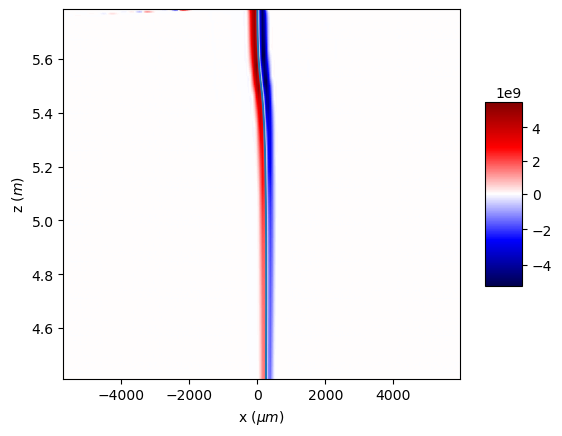

In [14]:

sp = np.linspace(np.max((smin - DtestCSR.formation_length, 0)), smin, 200)
xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

xL = np.min(xp1) - 3*DtestCSR.beam.sigma_x
xR = np.max(xp1) + 3*DtestCSR.beam.sigma_x




xp = np.linspace(xL  , xR, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')



sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = sp, z = CSR_integrand_z.T)
ax.plot(xp1*1e6, sp1 )

## Plot area 1 method 2

In [18]:
DtestCSR.beam._sigma_x_transform

5.2249435109624594e-05

In [19]:
tan_a

-12.910220026567055

In [23]:
tan_a

-12.910220026567055

In [27]:
temp = np.array([[1,2],[3,4],[5,6]])
temp.shape

(3, 2)

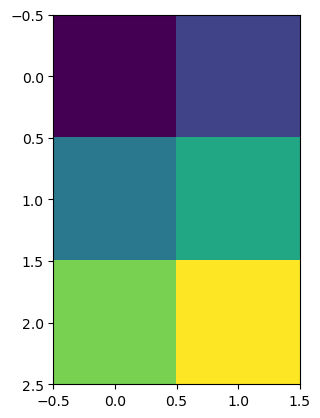

In [28]:
plt.imshow(temp)

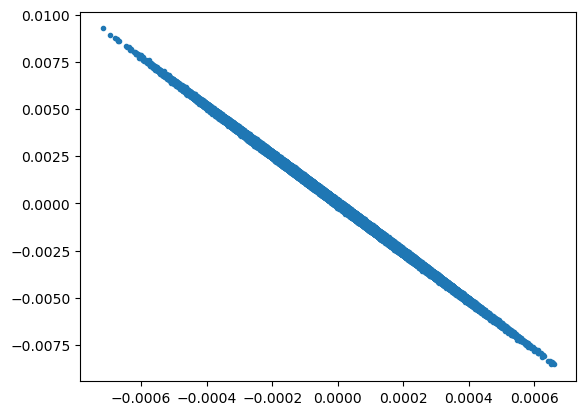

In [31]:
plt.plot(DtestCSR.beam.z, DtestCSR.beam.x, '.')

In [32]:
5*DtestCSR.beam._sigma_x

0.009509915995370035

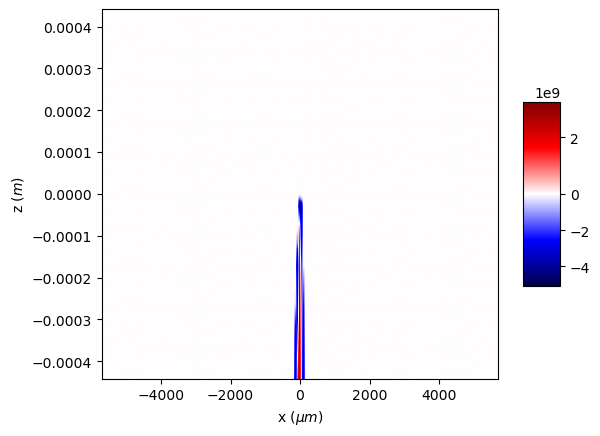

In [36]:
tan_theta = DtestCSR.beam._slope[0]
x0 = DtestCSR.beam.mean_x

if tan_theta < 1:   #if theta <45 degre, the chirp band can be ignored. theta is the angle in z-x plane
    s1 = s - 3*DtestCSR.beam._sigma_z
    s2 = s + 3*DtestCSR.beam._sigma_z
    xmin = x - 3*DtestCSR.beam._sigma_x
    xmax = x + 3*DtestCSR.beam._sigma_x
else:
    tan_alpha = -2*tan_theta/(1-tan_theta**2) # alpha = pi - 2 theta, tan_alpha > 0
    d = (5*DtestCSR.beam._sigma_x + x0 - x)/tan_alpha
    s1 = np.max((0,s - dz))
    s2 = s + 3*DtestCSR.beam._sigma_z
    xmax = x0 + 5*DtestCSR.beam._sigma_x
    xmin = x - 3*DtestCSR.beam._sigma_x_transform

sp = np.linspace(s1, s2, 200)
xp = np.linspace(xmin, xmax, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

#xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

#sp1 = sp[(xp1<=xR)&(xL<=xp1)]
#xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

#sp2 = sp[(xp2<=xR)&(xL<=xp2)]
#xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)       

In [ ]:
tan_theta = DtestCSR.beam._slope[0]
x0 = DtestCSR.beam.x0
if tan_theta >= 0: 
    if tan_theta < 1:   #if theta <45 degre, the chirp band can be ignored. theta is the angle in z-x plane
        s1 = s - 3*DtestCSR.beam._sigma_z
        s2 = s + 3*DtestCSR.beam._sigma_z
        xmin = x - 3*DtestCSR.beam._sigma_x
        xmax = X + 3*DtestCSR.beam._sigma_x
    else:
        tan_alpha = -2*tan_theta/(1-tan_theta**2) # alpha = pi - 2 theta, tan_alpha > 0
        d = (5*DtestCSR.beam._sigma_x + x0 - x)/tan_alpha
        s1 = np.max((0,s - dz))
        s2 = s + 3*DtestCSR.beam._sigma_z
        xmax = x0 + 5*DtestCSR.beam._sigma_x
        xmin = x - 3*DtestCSR.beam._sigma_x
        
else:
        

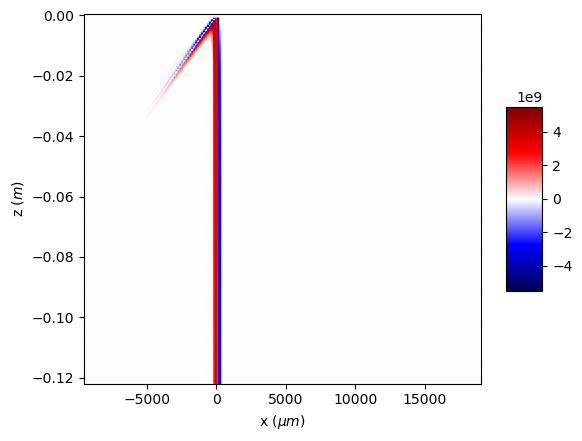

In [21]:
tan_a = DtestCSR.beam._slope[0]
tan_theta = -2*tan_a/(1-tan_a**2)
dz =10*DtestCSR.beam._sigma_x/tan_theta
x1 = x - dz*tan_theta
if tan_theta > 0:
    x2 = x + 5*DtestCSR.beam._sigma_x
    xmin, xmax = x1, x2
else:
    x2 = x - 5*DtestCSR.beam._sigma_x
    xmin, xmax = x2, x1

s1 = np.max((0,s - dz))

s2 = s + 3*DtestCSR.beam.sigma_z




    



sp = np.linspace(s1, s2, 200)
xp = np.linspace(xmin, xmax, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

#xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

#sp1 = sp[(xp1<=xR)&(xL<=xp1)]
#xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

#sp2 = sp[(xp2<=xR)&(xL<=xp2)]
#xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
#ax.plot(xp1*1e6, (sp1 - t))
#ax.plot(xp2*1e6, (sp2 - t))

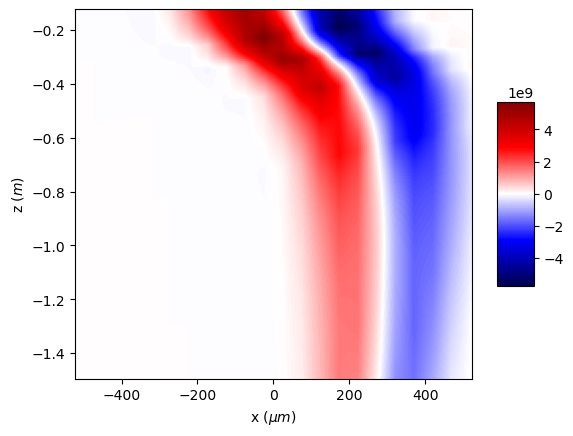

In [22]:
s3 = np.max((0, s1 - DtestCSR.formation_length))
xmin = x - 10*DtestCSR.beam._sigma_x_transform
xmax = x + 10*DtestCSR.beam._sigma_x_transform
sp = np.linspace(s3, s1, 200)
xp = np.linspace(xmin, xmax, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

#xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

#sp1 = sp[(xp1<=xR)&(xL<=xp1)]
#xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

#sp2 = sp[(xp2<=xR)&(xL<=xp2)]
#xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
#ax.plot(xp1*1e6, (sp1 - t))
#ax.plot(xp2*1e6, (sp2 - t))